In [256]:
import os
from pathlib import Path
import numpy as np
from keras_preprocessing import image


In [257]:
p = Path('Machine Learning/Image_Classification_Using_SVM/Images')
directory = p.glob("*")
print(type(directory))
image_data = []
labels=[]
labels_dic = {
    'cat':0,
    'dog':1,
    'horse':2,
    'human':3
}
for folders in directory:
    #print(folders)
    label = str(folders).split("\\")[-1][:-1]
    print(label)
    
    
    for img_path in folders.glob('*.jpg'):
        #print(img_path)
        img= image.load_img(img_path,target_size=(100,100))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dic[label])

print(type(labels))
        

<class 'generator'>
cat


dog


horse


human


<class 'list'>


In [258]:
image_data = np.array(image_data,dtype='float32')/255.0
# ZIP the image_data with labels
print(type(labels))
z = list(zip(image_data,labels))
np.random.shuffle(z)
image_data[:],labels = zip(*z)
labels = list(labels)

<class 'list'>


In [259]:
# Visualize the images
import matplotlib.pyplot as plt
def drawImg(img):
    plt.imshow(img)
    plt.show()
    return



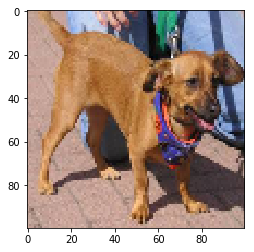

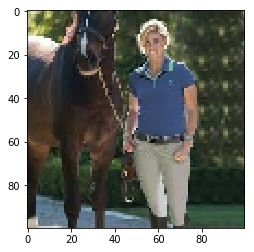

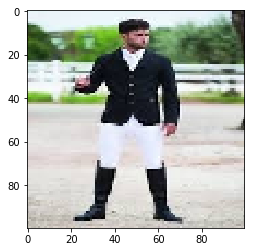

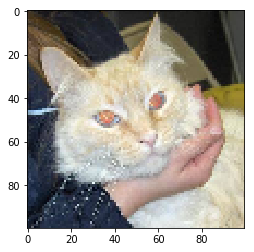

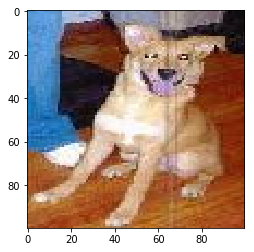

In [260]:
for i in range(5):
    drawImg(image_data[i])

In [261]:
# SVM CLASSIFIER
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.w = 0
    
    def hingLoss(self,X,Y,w,b):
        loss = 0.0
        loss += 0.5*np.dot(w,w.T)
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(X[i],w.T)+b)
            loss += self.C*max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self, X, Y,maxItr, batch_size = 100, learning_rate = 0.001):
        n_features = X.shape[1]
        n_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        w = np.zeros((1,n_features))
        b = 0.0
        
        losses = []
        
        for i in range(maxItr):
            l = self.hingLoss(X,Y,w,b)
            losses.append(l)
            # id ranges from 0 to n_samples
            # and then randomly shuffled.
            # [0,1,2,3,4...] to [56,21,42,3,..]
            ids = np.arange(n_samples)
            np.random.shuffle(ids)
            # batch starting index 
            for batch_start in range(0,n_samples,batch_size):
                gradw = 0
                gradb = 0
                # loop for current batch from start to batch size
                for j in range(batch_start,batch_start+batch_size):
                    if j<n_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(X[i],w.T)+b)
                        if ti>=1:
                            gradw += 0
                            gradb += 0
                        elif ti<1:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
            w = w - n*w +n*gradw
            b = b + n*gradb
        self.w = w
        self.b = b
        return w,b,losses

In [262]:
labels = np.array(labels)
print(image_data.shape,labels.shape)

(808, 100, 100, 3) (808,)


In [263]:
image_data = image_data.reshape((image_data.shape[0],-1))
print(image_data.shape)

(808, 30000)


In [264]:
def setDataClassWise(image_data,labels):
    data = {}
    #No. of samples
    m = image_data.shape[0]
    for i in range(len(np.unique(labels))):
        data[i] = []
    
    for i in range(m):
        data[labels[i]].append(image_data[i])
    
    for i in data.keys():
        data[i] = np.array(data[i])
    
    return data
    

In [265]:
data = setDataClassWise(image_data,labels)



In [266]:
def getDataPairforSVM(data1,data2):
    """combine data of two classes into a single matrix"""
    l1,l2 = data1.shape[0],data2.shape[0]
    no_of_samples = l1+l2
    no_of_features = data1.shape[1]
    
    data_pair = np.zeros((no_of_samples,no_of_features))
    data_labels = np.zeros((no_of_samples,))
    
    data_pair[:l1,:] =  data1
    data_pair[l1:,:] = data2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels

In [267]:
mySVM = SVM()
getDataPairforSVM(data[0],data[1])

(array([[0.26274511, 0.19607843, 0.16470589, ..., 0.81960785, 0.7647059 ,
         0.65098041],
        [0.98039216, 0.98039216, 0.98039216, ..., 0.38039216, 0.66666669,
         0.79607844],
        [0.47450981, 0.29803923, 0.27843139, ..., 0.59215689, 0.41176471,
         0.36078432],
        ...,
        [0.88627452, 0.88627452, 0.91764706, ..., 0.7019608 , 0.72156864,
         0.69803923],
        [0.61960787, 0.45882353, 0.44313726, ..., 0.16470589, 0.13333334,
         0.1254902 ],
        [0.51764709, 0.51372552, 0.49411765, ..., 0.56862748, 0.59607846,
         0.23137255]]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -

In [286]:
def trainSVM(x,y):
    svm_classifiers = {}
    for i in range(len(np.unique(labels))):
        svm_classifiers[i] = {}
        for j in range(i+1,len(np.unique(labels))):
            xpair,ypair = getDataPairforSVM(data[i],data[j])
            wts,bias,loss = mySVM.fit(xpair,ypair,maxItr=1000)
            svm_classifiers[i][j] = (wts,bias)
    return svm_classifiers

In [288]:
svm_classifiers = trainSVM(image_data,labels)
svm_classifiers[0][1]

(array([[-0.00182394,  0.00582728,  0.00366887, ..., -0.00093654,
          0.00240974, -0.00105568]]), 0.00499999999999999)

In [289]:

CLASSES = len(np.unique(labels))

In [290]:
# Cat --> 0
# dog --> 1
# horse --> 2
# human --> 3
def binaryPredict(x,wts,b):
    z = np.dot(x,wts.T)+b
    if z >=0:
        return 1
    else:
        return -1

In [291]:

def predict(x):
    count = np.zeros((CLASSES,))
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction 
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction
    

In [303]:
#print(predict(image_data[6]))
#print(labels[6])

In [300]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [302]:
accuracy(image_data,labels)

0.46905940594059403